In [1]:
from FUCCIDataset import FUCCIDataset, ReferenceChannelDataset, FUCCIChannelDataset
import numpy as np
import torch
from kornia.utils import tensor_to_image
from FUCCIDataset import FUCCIDatasetInMemory, ReferenceChannelDatasetInMemory, FUCCIChannelDatasetInMemory
from LightningModules import FUCCIDataModule
from microfilm import microplot

In [2]:
FUCCI_PATH = '/home/ishang/cross-modal-autoencoders/FUCCI-dev-data'
# FUCCI_PATH = '/home/ishang/implicit-cell-model/FUCCI-dev-data'
# FUCCI_PATH = '/data/ishang/Fucci-dataset-v3_filtered/'
# ds_og = ReferenceChannelDataset(FUCCI_PATH, imsize=256)
# ds = ReferenceChannelDataset(FUCCI_PATH, imsize=256)
ds = ReferenceChannelDatasetInMemory(FUCCI_PATH, imsize=256)
# ds = ReferenceChannelDatasetInMemory(FUCCI_PATH, imsize=256)
# print(ds.dataset_images.shape)
ds[0].shape
ds[20].shape
print(type(ds[0]))
# print(type(ds_og[0]))
# print(len(ds_og))

<class 'torch.Tensor'>


In [3]:
# ct = 0
# for i in range(len(ds_og)):
#     # print(ds[i].shape, ds_og[i].shape)
#     if not torch.allclose(ds[i], ds_og[i]):
#         print(i)
#         ct += 1
# print(ct)

32
[tensor(-0.3252), tensor(-0.3534), tensor(-0.4541), tensor(-0.2942), tensor(-0.1139), tensor(-0.1742), tensor(0.2248), tensor(-0.3497), tensor(0.3270), tensor(-0.0245), tensor(0.7157), tensor(0.1819), tensor(0.1869), tensor(0.4797), tensor(0.3491), tensor(-0.0920), tensor(0.3332), tensor(0.4108), tensor(0.3916), tensor(0.3259), tensor(0.1086), tensor(0.1172), tensor(1.), tensor(0.6641), tensor(1.), tensor(1.), tensor(0.9745), tensor(1.), tensor(0.5311), tensor(1.), tensor(1.), tensor(1.)]
tensor(1.)


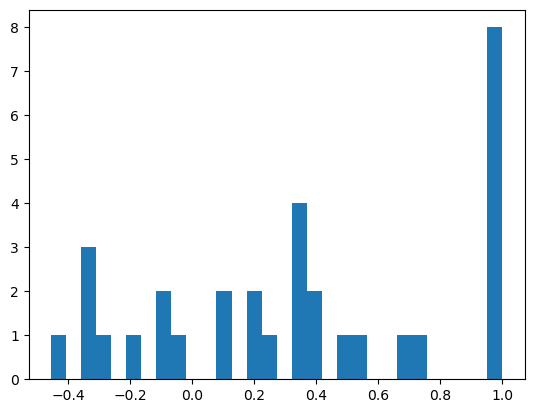

[tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.), tensor(-1.)]


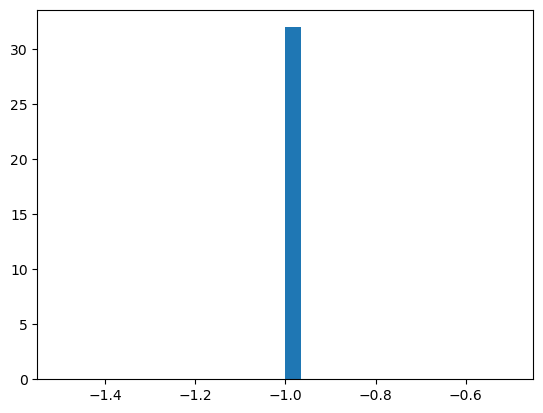

In [4]:
print(len(ds))
# get max value of each image and max value of the whole dataset
max_vals = []
for i in range(len(ds)):
    max_vals.append(torch.max(ds[i]))
print(max_vals)
print(max(max_vals))
# plot histogram of max values
import matplotlib.pyplot as plt
plt.hist(max_vals, bins=30)
plt.show()

# do the same for min values
min_vals = []
for i in range(len(ds)):
    min_vals.append(torch.min(ds[i]))
print(min_vals)
plt.clf()
plt.hist(min_vals, bins=30)
plt.show()

In [5]:
dm = FUCCIDataModule(data_dir=FUCCI_PATH, dataset="reference", batch_size=16, num_workers=32, imsize=1024)
dm_small = FUCCIDataModule(data_dir=FUCCI_PATH, dataset="reference", batch_size=16, num_workers=32, imsize=256)
dm_super_small = FUCCIDataModule(data_dir=FUCCI_PATH, dataset="reference", batch_size=16, num_workers=32, imsize=64)
train_data = dm.train_dataloader()
data_batch = next(iter(train_data))
data_batch_small = next(iter(dm_small.train_dataloader()))

(2, 1024, 1024)


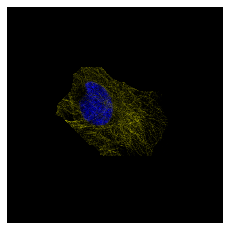

In [6]:
torch.max(data_batch[0, 1, :, :])
cmap = ['pure_blue', 'pure_yellow', 'pure_green', 'pure_red']
img = np.moveaxis(tensor_to_image(data_batch[0]), -1, 0)
print(img.shape)
microplot.microshow(images=img, cmaps=cmap[:2])

(2, 1024, 1024)
(2, 256, 256)
-1.0 0.66682947


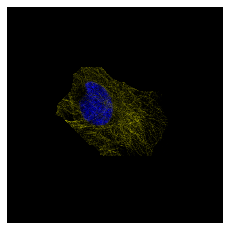

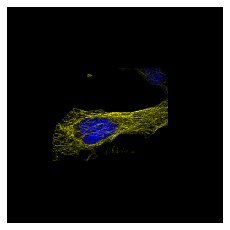

In [7]:
img_small = np.moveaxis(tensor_to_image(data_batch_small[0]), -1, 0)
img_1024 = microplot.microshow(images=img, cmaps=cmap[:2])
img_256 = microplot.microshow(images=img_small, cmaps=cmap[:2]) 
img_1024.savefig("sample_ref_1024.png")
img_256.savefig("sample_ref_256.png")
print(img.shape)
print(img_small.shape)
print(img.min(), img.max())

In [8]:
# import imageio as iio

# iio.imwrite("sample_ref_nuclei_256.png", img_small[0])
# iio.imwrite("sample_ref_microtubule_256.png", img_small[1])
# iio.imwrite("sample_ref_nuclei_1024.png", img[0])
# iio.imwrite("sample_ref_microtubule_1024.png", img[1])

# convert images from -1 to 1 to 0 to 255
data_batch_super_small = next(iter(dm_super_small.train_dataloader()))
img_super_small = np.moveaxis(tensor_to_image(data_batch_super_small[0]), -1, 0)
img_super_small = (255 * (img_super_small / 2 + 0.5)).astype(np.uint8)
img_small = (255 * (img_small / 2 + 0.5)).astype(np.uint8)
img = (255 * (img / 2 + 0.5)).astype(np.uint8)
from PIL import Image
Image.fromarray(img_small[0]).convert("L").save("sample_ref_nuclei_256.png")
Image.fromarray(img_small[1]).convert("L").save("sample_ref_microtubule_256.png")
Image.fromarray(img[0]).convert("L").save("sample_ref_nuclei_1024.png")
Image.fromarray(img[1]).convert("L").save("sample_ref_microtubule_1024.png")
Image.fromarray(img_super_small[0]).convert("L").save("sample_ref_nuclei_64.png")
Image.fromarray(img_super_small[1]).convert("L").save("sample_ref_microtubule_64.png")